# Setup

In [72]:
import numpy as np
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12

# Excercise 1

In [73]:
class Perceptron:
    """
    A simple Rosenblatt Perceptron implementation.
    """
    
    def __init__(self, n_inputs, learning_rate=0.1):
        """
        Initialise the perceptron.
        
        Parameters:
        -----------
        n_inputs : int
        Number of input features
        learning_rate : float
        Learning rate (alpha) for weight updates
        """
        # TODO: add code here to initialise weights to small random values (e.g., -0.5..0.5)
        ## See hint in the markdown cell above
        self.bias = np.random.uniform(-0.5, 0.5)
        self.learning_rate = learning_rate

        self.weights = np.random.uniform(-0.5, 0.5, size=n_inputs)
    
    def step_function(self, x):
        """
        Step activation function.
        
        Returns 1 if x >= 0, else 0.
        """
        # TODO: add code here to return 1 if x ≥ 0, else return 0
        ## See hint in the markdown cell above

        if (x >= 0):
            return 1
        else:
            return 0


        
    def predict(self, inputs):
        """
        Compute the perceptron output for given inputs.
        
        Parameters:
        -----------
        inputs : array-like
        Input values (x1, x2, ...)
        
        Returns:
        --------
        int : 0 or 1
        """
        # TODO: add code here to compute the weighted sum
        ## See hint in the markdown cell above
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.step_function(weighted_sum)
    
    def train(self, X, y, epochs, verbose=True):
        """
        Train the perceptron using the perceptron learning rule.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        Training inputs
        y : array-like, shape (n_samples,)
        Target outputs (0 or 1)
        epochs : int
        Number of training epochs
        verbose : bool
        If True, print weights after each epoch
        
        Returns:
        --------
        list : History of (weights, bias) tuples for each epoch
        """
        history = []
        
        # Store initial weights
        history.append((self.weights.copy(), self.bias))
        
        for epoch in range(epochs):
            total_error = 0
        
            for i in range(len(X)):
                # Get prediction
                prediction = self.predict(X[i])
        
                # Calculate error
                error = y[i] - prediction
                total_error += abs(error)
            
                # Update weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
        
            # Store weights after this epoch
            # TODO: add code here to store weights after each epoch in a list
            ## See hint in the markdown cell above
            history.append((self.weights.copy(), self.bias))

            if verbose:
                print(f"Epoch {epoch + 1}: weights = {self.weights}, bias = {self.bias:.4f}, errors = {total_error}")
            
            # Early stopping if no errors
            if total_error == 0:
                if verbose:
                    print(f"Converged after {epoch + 1} epochs!")
                break
            
        return history

# Excercise 2

## Task 2.1

In [74]:
# Define training data for AND
X_and = np.array([
 [0, 0],
 [0, 1],
 [1, 0],
 [1, 1]
])
y_and = np.array([0, 0, 0, 1])
print("AND Training Data:")
print("X:")
print(X_and)
print("y:", y_and)


AND Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 0 0 1]


## Task 2.2

In [75]:
# Create perceptron
perceptron_and = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_and.weights)
print("Initial bias:", perceptron_and.bias)
print("\nTraining...\n")

# Train (store the history for later visualisation)
history_and = perceptron_and.train(X_and, y_and, epochs=10)

# Test on all inputs
print("\nTesting AND perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_and)):
    prediction = perceptron_and.predict(X_and[i])
    correct = "✓" if prediction == y_and[i] else "✗"
    if prediction != y_and[i]:
        all_correct = False
    print(f"Input: {X_and[i]} -> Predicted: {prediction}, Expected: {y_and[i]} {correct}")

print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [0.45071431 0.23199394]
Initial bias: -0.1254598811526375

Training...

Epoch 1: weights = [0.35071431 0.13199394], bias = -0.3255, errors = 2
Epoch 2: weights = [0.35071431 0.23199394], bias = -0.3255, errors = 2
Epoch 3: weights = [0.25071431 0.23199394], bias = -0.4255, errors = 1
Epoch 4: weights = [0.25071431 0.23199394], bias = -0.4255, errors = 0
Converged after 4 epochs!

Testing AND perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 0, Expected: 0 ✓
Input: [1 0] -> Predicted: 0, Expected: 0 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


## Task 2.3

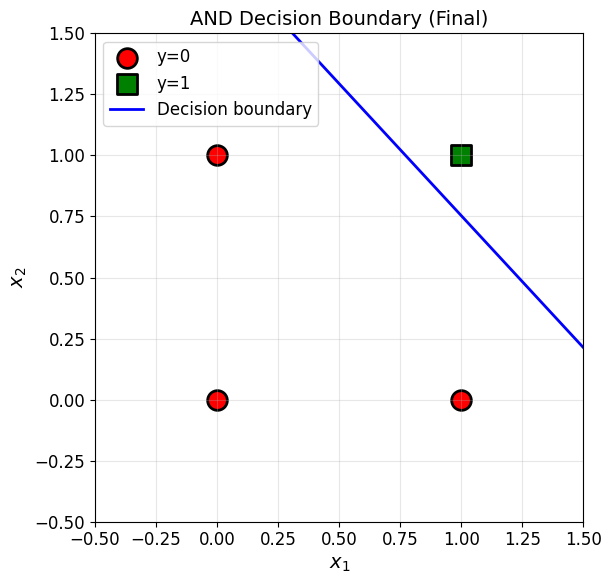

In [76]:
# Plotting function
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary", ax=None):
    """
    Plot data points and decision boundary.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, 2)
    Input data points
    y : array-like, shape (n_samples,)
    Labels (0 or 1)
    weights : array-like, shape (2,)
    Perceptron weights [w1, w2]
    bias : float
    Perceptron bias
    title : str
    Plot title
    ax : matplotlib axis (optional)
    Axis to plot on. If None, creates new figure.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
 
    # Plot points
    for i in range(len(X)):
        if y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], c='red', marker='o', s=200,
                edgecolors='black', linewidths=2, label='y=0' if i == 0 else '')
        else:
            ax.scatter(X[i, 0], X[i, 1], c='green', marker='s', s=200,
            edgecolors='black', linewidths=2, label='y=1' if i == 3 else '')
    
# Plot decision boundary
# Line: w1*x1 + w2*x2 + b = 0
# => x2 = -(w1/w2)*x1 - b/w2
 
    x1_range = np.linspace(-0.5, 1.5, 100)
 
    if abs(weights[1]) > 1e-10: # Avoid division by zero
        x2_boundary = -(weights[0] / weights[1]) * x1_range - (bias / weights[1])
        ax.plot(x1_range, x2_boundary, 'b-', linewidth=2, label='Decision boundary')
    else:
        # Vertical line case
        if abs(weights[0]) > 1e-10:
            x1_boundary = -bias / weights[0]
            ax.axvline(x=x1_boundary, color='b', linewidth=2, label='Decision boundary')
 
     # Formatting

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('$x_1$', fontsize=14)
    ax.set_ylabel('$x_2$', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')
    ax.set_aspect('equal')
 
    return ax
# Test the plotting function with the trained AND perceptron
plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias,
 "AND Decision Boundary (Final)")
plt.tight_layout()
plt.show()


## Task 2.4

AND - Decision Boundary Evolution:


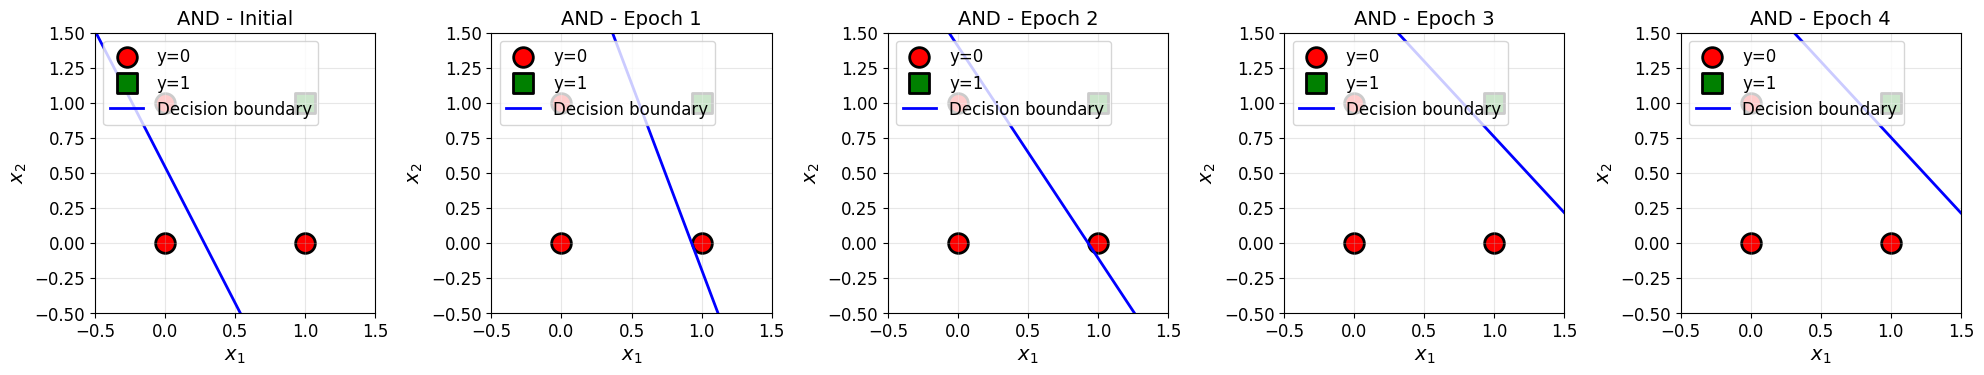

In [77]:
# Visualise decision boundary evolution across epochs
def plot_training_evolution(X, y, history, title_prefix=""):
    """
    Plot decision boundary evolution across training epochs.
    """
    n_epochs = len(history)
    
    # Determine grid size
    n_cols = min(5, n_epochs)
    n_rows = (n_epochs + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
    
    # Handle single row case
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (weights, bias) in enumerate(history):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]
    
        epoch_label = "Initial" if idx == 0 else f"Epoch {idx}"
        plot_decision_boundary(X, y, weights, bias,
                                f"{title_prefix}{epoch_label}", ax=ax)
    
    # Hide empty subplots
    for idx in range(n_epochs, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    # Plot AND training evolution
print("AND - Decision Boundary Evolution:")
plot_training_evolution(X_and, y_and, history_and, "AND - ")

## Task 2.5

In [78]:
import pandas as pd
def create_weight_table(history):
    """
    Create a pandas DataFrame showing weights at each epoch.
    """
    data = {
    'Epoch': [],
    'w₁': [],
    'w₂': [],
    'bias': []
    }
 
    for epoch, (weights, bias) in enumerate(history):
        data['Epoch'].append('Initial' if epoch == 0 else epoch)
        data['w₁'].append(f"{weights[0]:.4f}")
        data['w₂'].append(f"{weights[1]:.4f}")
        data['bias'].append(f"{bias:.4f}")
    
    return pd.DataFrame(data)
print("AND - Weight History Table:")
df_and = create_weight_table(history_and)
display(df_and)


AND - Weight History Table:


,Epoch,w₁,w₂,bias
0,Initial,0.4507,0.2320,-0.1255
1,1,0.3507,0.1320,-0.3255
2,2,0.3507,0.2320,-0.3255
3,3,0.2507,0.2320,-0.4255
4,4,0.2507,0.2320,-0.4255


# Exercise 3

## Task 3.1

In [79]:
# Define training data for OR
X_or = np.array([
 [0, 0],
 [0, 1],
 [1, 0],
 [1, 1]
])
y_or = np.array([0, 1, 1, 1])
print("OR Training Data:")
print("X:")
print(X_or)
print("y:", y_or)

OR Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 1]


In [80]:
# Create perceptron
perceptron_or = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_or.weights)
print("Initial bias:", perceptron_or.bias)
print("\nTraining...\n")

# Train (store the history for later visualisation)
history_or = perceptron_or.train(X_or, y_or, epochs=10)

# Test on all inputs
print("\nTesting OR perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_or)):
    prediction = perceptron_or.predict(X_or[i])
    correct = "✓" if prediction == y_or[i] else "✗"
    if prediction != y_or[i]:
        all_correct = False
    print(f"Input: {X_or[i]} -> Predicted: {prediction}, Expected: {y_or[i]} {correct}")

print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [-0.34398136 -0.34400548]
Initial bias: 0.0986584841970366

Training...

Epoch 1: weights = [-0.14398136 -0.14400548], bias = 0.2987, errors = 4
Epoch 2: weights = [-0.04398136 -0.04400548], bias = 0.2987, errors = 2
Epoch 3: weights = [-0.04398136 -0.04400548], bias = 0.1987, errors = 1
Epoch 4: weights = [-0.04398136 -0.04400548], bias = 0.0987, errors = 1
Epoch 5: weights = [-0.04398136  0.05599452], bias = 0.0987, errors = 2
Epoch 6: weights = [0.05601864 0.05599452], bias = 0.0987, errors = 2
Epoch 7: weights = [0.05601864 0.05599452], bias = -0.0013, errors = 1
Epoch 8: weights = [0.05601864 0.05599452], bias = -0.0013, errors = 0
Converged after 8 epochs!

Testing OR perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 1, Expected: 1 ✓
Input: [1 0] -> Predicted: 1, Expected: 1 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


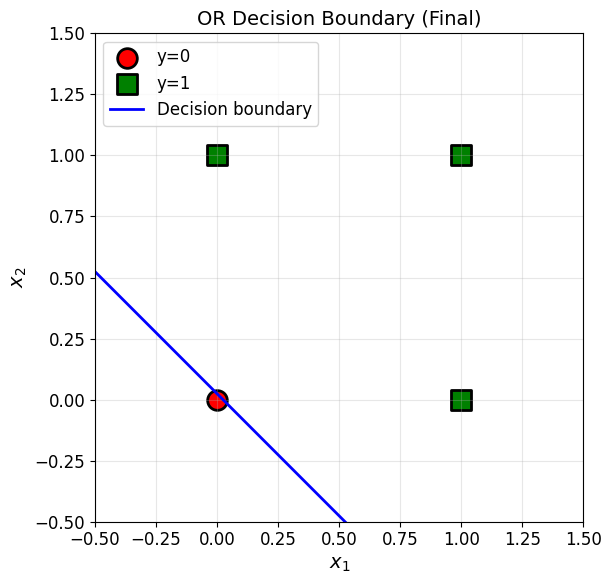

In [81]:
# Test the plotting function with the trained OR perceptron
plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias,
 "OR Decision Boundary (Final)")
plt.tight_layout()
plt.show()

In [82]:
print("OR - Weight History Table:")
df_or = create_weight_table(history_or)
display(df_or)

OR - Weight History Table:


,Epoch,w₁,w₂,bias
0,Initial,-0.3440,-0.3440,0.0987
1,1,-0.1440,-0.1440,0.2987
2,2,-0.0440,-0.0440,0.2987
3,3,-0.0440,-0.0440,0.1987
4,4,-0.0440,-0.0440,0.0987
5,5,-0.0440,0.0560,0.0987
6,6,0.0560,0.0560,0.0987
7,7,0.0560,0.0560,-0.0013
8,8,0.0560,0.0560,-0.0013


OR - Decision Boundary Evolution:


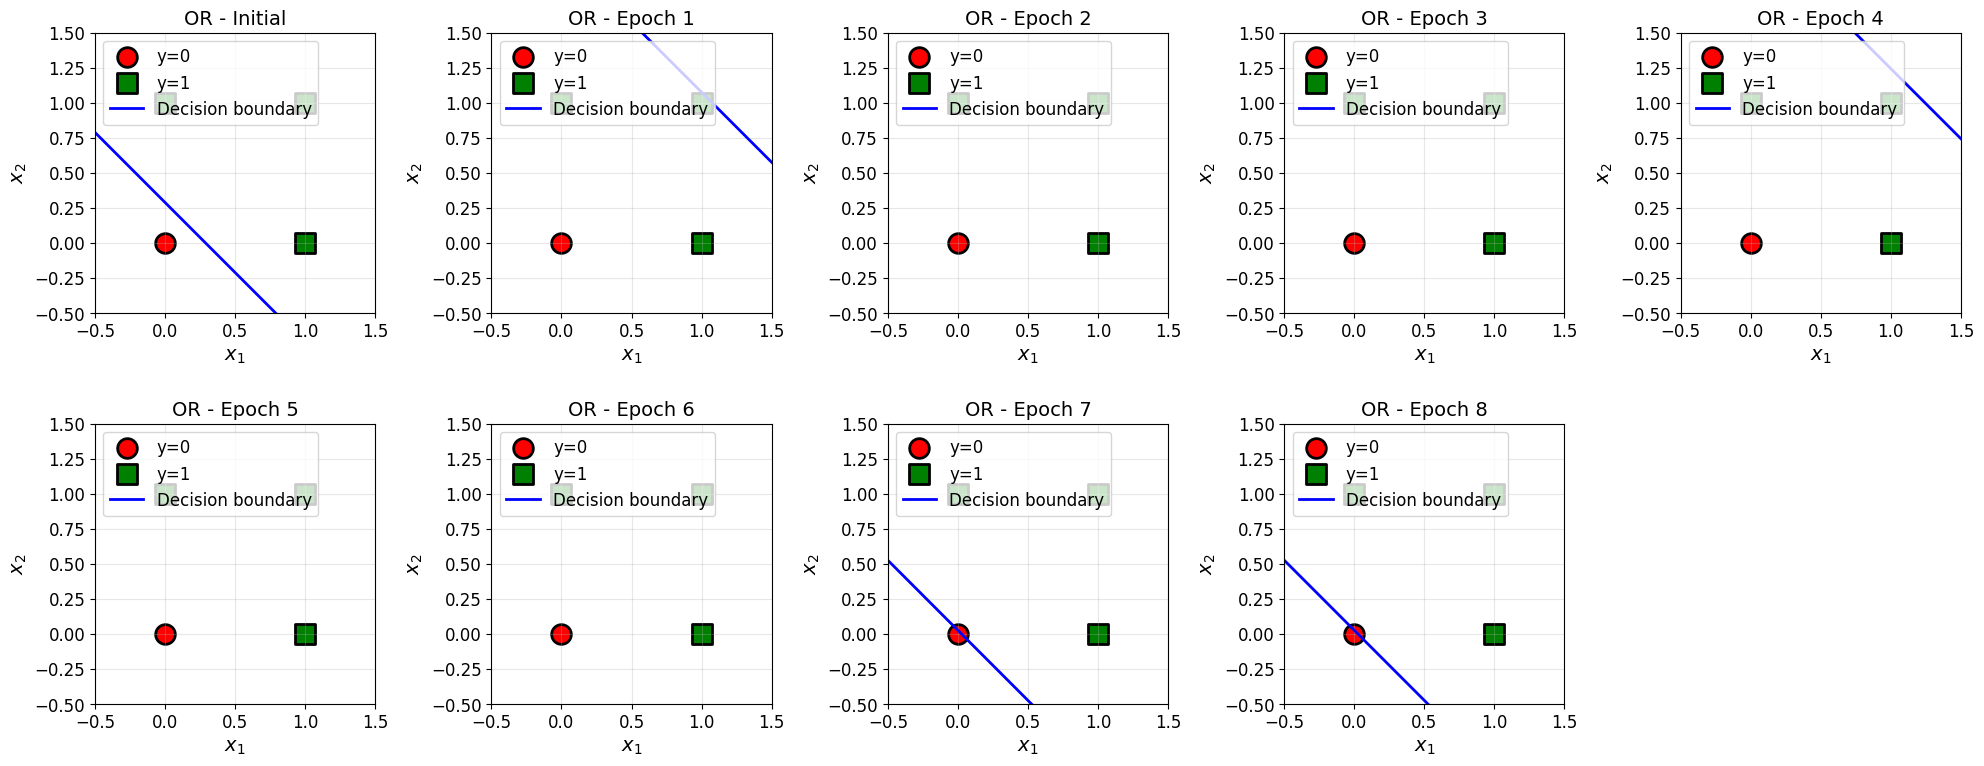

In [83]:
# Plot OR training evolution
print("OR - Decision Boundary Evolution:")
plot_training_evolution(X_or, y_or, history_or, "OR - ")

## Task 3.2

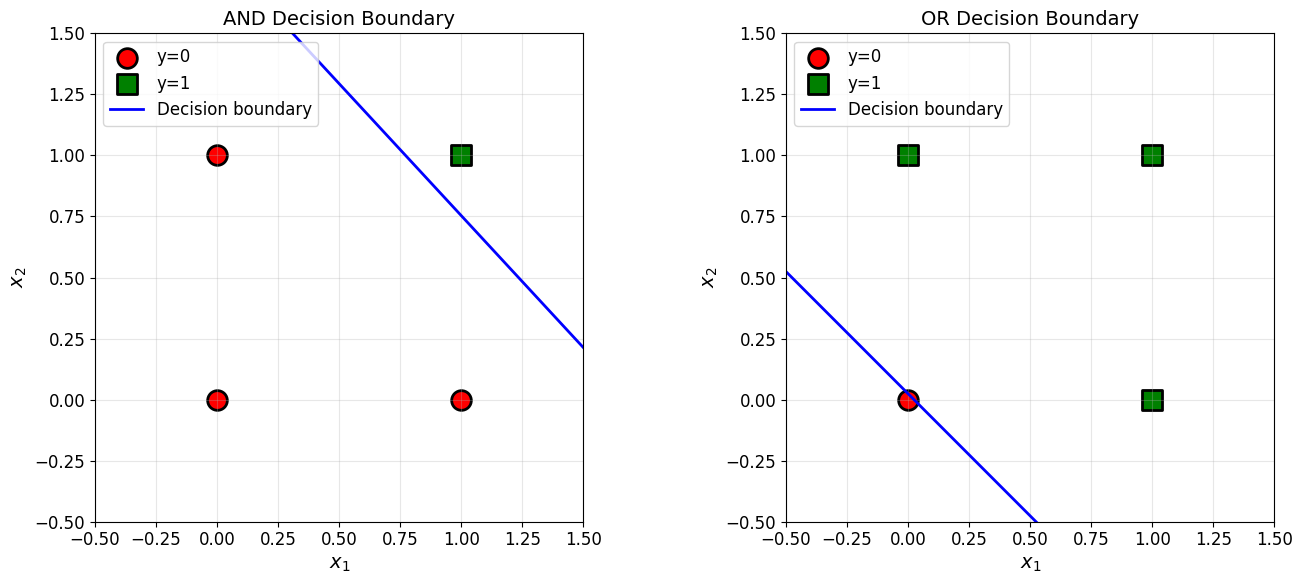

Discussion:
------------------------------------------------------------
AND: The decision boundary separates (1,1) from the other three points.
 The line passes 'above' most points, classifying only the top-right as 1.

OR: The decision boundary separates (0,0) from the other three points.
 The line passes 'below' most points, classifying only the origin as 0.

Both are solvable because in each case, the two classes can be separated
by a single straight line - they are LINEARLY SEPARABLE.


In [84]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias,
                        "AND Decision Boundary", ax=ax1)
plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias,
                        "OR Decision Boundary", ax=ax2)

plt.tight_layout()
plt.show()

# Discussion
print("Discussion:")
print("-" * 60)
print("AND: The decision boundary separates (1,1) from the other three points.")
print(" The line passes 'above' most points, classifying only the top-right as 1.")
print()
print("OR: The decision boundary separates (0,0) from the other three points.")
print(" The line passes 'below' most points, classifying only the origin as 0.")
print()
print("Both are solvable because in each case, the two classes can be separated")
print("by a single straight line - they are LINEARLY SEPARABLE.")

# Exercise 4: The XOR Problem – Demonstrating Linear Inseparability

## Task 4.1

In [85]:
# Define training data for XOR
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_xor = np.array([0, 1, 1, 0])

print("XOR Training Data:")
print("X:")
print(X_xor)
print("y:", y_xor)

XOR Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 0]


In [86]:
# Create and train perceptron for XOR
perceptron_xor = Perceptron(n_inputs=2, learning_rate=0.1)
print("Attempting to train perceptron for XOR...")
print("(Using 100 epochs to demonstrate non-convergence)\n")

# Train with verbose=False to avoid too much output
history_xor = perceptron_xor.train(X_xor, y_xor, epochs=100, verbose=False)

print(f"Training completed after {len(history_xor) - 1} epochs.")
print(f"Final weights: {perceptron_xor.weights}")
print(f"Final bias: {perceptron_xor.bias:.4f}")

Attempting to train perceptron for XOR...
(Using 100 epochs to demonstrate non-convergence)

Training completed after 100 epochs.
Final weights: [-0.13382385  0.00111501]
Final bias: 0.0581


In [87]:
# Test on all inputs
print("Testing XOR perceptron (single layer):")
print("-" * 40)
correct_count = 0
for i in range(len(X_xor)):
    prediction = perceptron_xor.predict(X_xor[i])
    is_correct = prediction == y_xor[i]
    if is_correct:
        correct_count += 1
    symbol = "✓" if is_correct else "✗"
    print(f"XOR({X_xor[i][0]}, {X_xor[i][1]}) -> Predicted: {prediction}, Expected: {y_xor[i]} {symbol}")

print("-" * 40)
accuracy = (correct_count / len(X_xor)) * 100
print(f"Accuracy: {correct_count}/{len(X_xor)} = {accuracy:.1f}%")

Testing XOR perceptron (single layer):
----------------------------------------
XOR(0, 0) -> Predicted: 1, Expected: 0 ✗
XOR(0, 1) -> Predicted: 1, Expected: 1 ✓
XOR(1, 0) -> Predicted: 0, Expected: 1 ✗
XOR(1, 1) -> Predicted: 0, Expected: 0 ✓
----------------------------------------
Accuracy: 2/4 = 50.0%


## Task 4.2

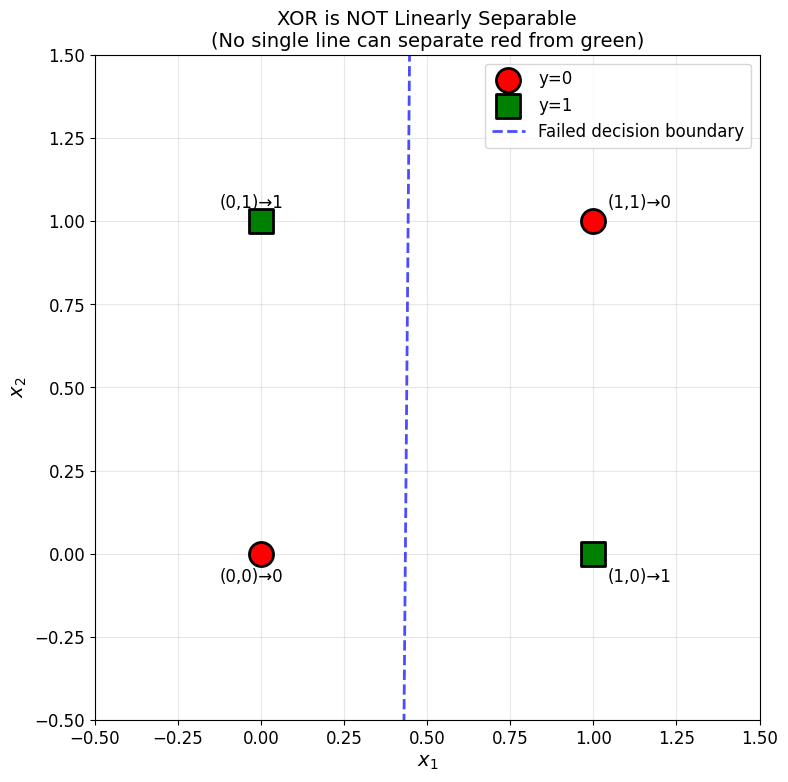

In [88]:
# Visualise XOR data points and failed decision boundary
fig, ax = plt.subplots(figsize=(8, 8))

# Plot points
for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='red', marker='o', s=300,
                  edgecolors='black', linewidths=2, zorder=5,
                  label='y=0' if i == 0 else '')
    else:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='green', marker='s', s=300,
                  edgecolors='black', linewidths=2, zorder=5,
                  label='y=1' if i == 1 else '')

# Add labels to points
ax.annotate('(0,0)→0', (0, 0), textcoords="offset points", xytext=(-30, -20), fontsize=12)
ax.annotate('(0,1)→1', (0, 1), textcoords="offset points", xytext=(-30, 10), fontsize=12)
ax.annotate('(1,0)→1', (1, 0), textcoords="offset points", xytext=(10, -20), fontsize=12)
ax.annotate('(1,1)→0', (1, 1), textcoords="offset points", xytext=(10, 10), fontsize=12)

# Plot the failed decision boundary
x1_range = np.linspace(-0.5, 1.5, 100)
if abs(perceptron_xor.weights[1]) > 1e-10:
    x2_boundary = -(perceptron_xor.weights[0] / perceptron_xor.weights[1]) * x1_range \
                  - (perceptron_xor.bias / perceptron_xor.weights[1])
    ax.plot(x1_range, x2_boundary, 'b--', linewidth=2, alpha=0.7,
            label='Failed decision boundary')

# Formatting
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_title('XOR is NOT Linearly Separable\n(No single line can separate red from green)',
            fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## Task 4.3 

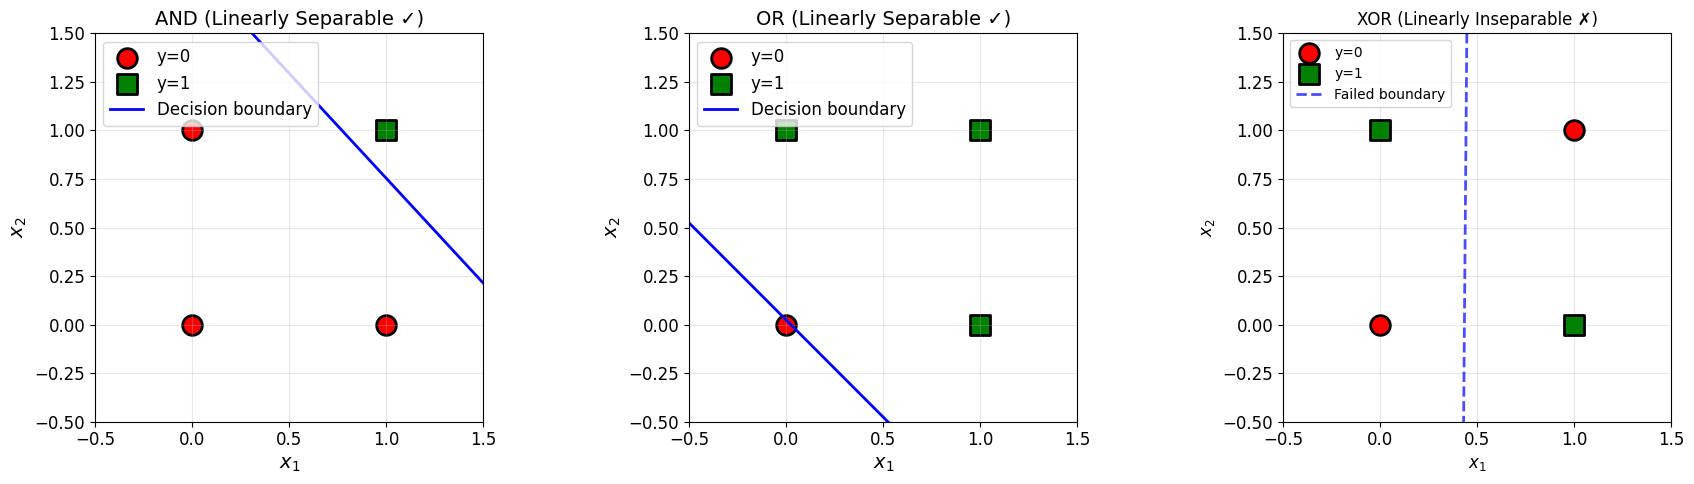

Figure saved as 'linear_separability_comparison.png'


In [89]:
# Create 3-panel comparison figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot AND decision boundary
plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias,
                        "AND (Linearly Separable ✓)", ax=ax1)

# Plot OR decision boundary
plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias,
                        "OR (Linearly Separable ✓)", ax=ax2)

# Plot XOR (no valid boundary)
for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax3.scatter(X_xor[i, 0], X_xor[i, 1], c='red', marker='o', s=200,
                   edgecolors='black', linewidths=2, zorder=5,
                   label='y=0' if i == 0 else '')
    else:
        ax3.scatter(X_xor[i, 0], X_xor[i, 1], c='green', marker='s', s=200,
                   edgecolors='black', linewidths=2, zorder=5,
                   label='y=1' if i == 1 else '')

# Plot the failed decision boundary for XOR
x1_range = np.linspace(-0.5, 1.5, 100)
if abs(perceptron_xor.weights[1]) > 1e-10:
    x2_boundary = -(perceptron_xor.weights[0] / perceptron_xor.weights[1]) * x1_range \
                  - (perceptron_xor.bias / perceptron_xor.weights[1])
    ax3.plot(x1_range, x2_boundary, 'b--', linewidth=2, alpha=0.7,
            label='Failed boundary')

ax3.set_xlim(-0.5, 1.5)
ax3.set_ylim(-0.5, 1.5)
ax3.set_xlabel('$x_1$', fontsize=12)
ax3.set_ylabel('$x_2$', fontsize=12)
ax3.set_title('XOR (Linearly Inseparable ✗)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left', fontsize=10)
ax3.set_aspect('equal')

plt.tight_layout()
plt.savefig('linear_separability_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure saved as 'linear_separability_comparison.png'")

# Exercise 5

## Task 5.1

In [90]:
# Two-layer perceptron with pre-defined weights
def xor_two_layer_manual(x1, x2, verbose=False):
    """
    Compute XOR using a two-layer perceptron with pre-defined weights.
    
    Architecture:
    - Hidden neuron 1: fires when at most one input is 1 (-x1 - x2 + 1.5 >= 0)
    - Hidden neuron 2: fires when at least one input is 1 (x1 + x2 >= 0.5)
    - Output neuron: h1 AND h2 (both hidden neurons must fire)
    
    Parameters:
    -----------
    x1, x2 : int
        Input values (0 or 1)
    verbose : bool
        If True, print intermediate calculations
    
    Returns:
    --------
    int : XOR result (0 or 1)
    """
    # Step function
    step = lambda x: 1 if x >= 0 else 0
    
    # Hidden layer
    # Perceptron 1: w1=-1, w2=-1, b=+1.5 (NAND: at most one input is 1)
    h1_sum = x1 * (-1) + x2 * (-1) + 1.5
    h1 = step(h1_sum)
    
    # Perceptron 2: w1=+1, w2=+1, b=-0.5 (OR: at least one input is 1)
    h2_sum = x1 * 1 + x2 * 1 - 0.5
    h2 = step(h2_sum)
    
    # Output layer
    # Perceptron 3: w1=+1, w2=+1, b=-1.5 (AND: both hidden neurons fire)
    y_sum = h1 * 1 + h2 * 1 - 1.5
    y = step(y_sum)
    
    if verbose:
        print(f"Input: ({x1}, {x2})")
        print(f"  Hidden 1 (NAND): {x1}*(-1) + {x2}*(-1) + 1.5 = {h1_sum:.1f} -> h1 = {h1}")
        print(f"  Hidden 2 (OR):   {x1}*1 + {x2}*1 - 0.5 = {h2_sum:.1f} -> h2 = {h2}")
        print(f"  Output (AND):    {h1}*1 + {h2}*1 - 1.5 = {y_sum:.1f} -> y = {y}")
    
    return y

# Test
print("Testing two-layer perceptron for XOR (pre-defined weights):")
print("=" * 60)
all_correct = True
for x1 in [0, 1]:
    for x2 in [0, 1]:
        result = xor_two_layer_manual(x1, x2, verbose=True)
        expected = x1 ^ x2  # Python's XOR operator
        correct = "✓" if result == expected else "✗"
        if result != expected:
            all_correct = False
        print(f"  XOR({x1}, {x2}) = {result}, Expected: {expected} {correct}\n")

print("=" * 60)
print(f"All predictions correct: {all_correct}")

Testing two-layer perceptron for XOR (pre-defined weights):
Input: (0, 0)
  Hidden 1 (NAND): 0*(-1) + 0*(-1) + 1.5 = 1.5 -> h1 = 1
  Hidden 2 (OR):   0*1 + 0*1 - 0.5 = -0.5 -> h2 = 0
  Output (AND):    1*1 + 0*1 - 1.5 = -0.5 -> y = 0
  XOR(0, 0) = 0, Expected: 0 ✓

Input: (0, 1)
  Hidden 1 (NAND): 0*(-1) + 1*(-1) + 1.5 = 0.5 -> h1 = 1
  Hidden 2 (OR):   0*1 + 1*1 - 0.5 = 0.5 -> h2 = 1
  Output (AND):    1*1 + 1*1 - 1.5 = 0.5 -> y = 1
  XOR(0, 1) = 1, Expected: 1 ✓

Input: (1, 0)
  Hidden 1 (NAND): 1*(-1) + 0*(-1) + 1.5 = 0.5 -> h1 = 1
  Hidden 2 (OR):   1*1 + 0*1 - 0.5 = 0.5 -> h2 = 1
  Output (AND):    1*1 + 1*1 - 1.5 = 0.5 -> y = 1
  XOR(1, 0) = 1, Expected: 1 ✓

Input: (1, 1)
  Hidden 1 (NAND): 1*(-1) + 1*(-1) + 1.5 = -0.5 -> h1 = 0
  Hidden 2 (OR):   1*1 + 1*1 - 0.5 = 1.5 -> h2 = 1
  Output (AND):    0*1 + 1*1 - 1.5 = -0.5 -> y = 0
  XOR(1, 1) = 0, Expected: 0 ✓

All predictions correct: True


## Task 5.2

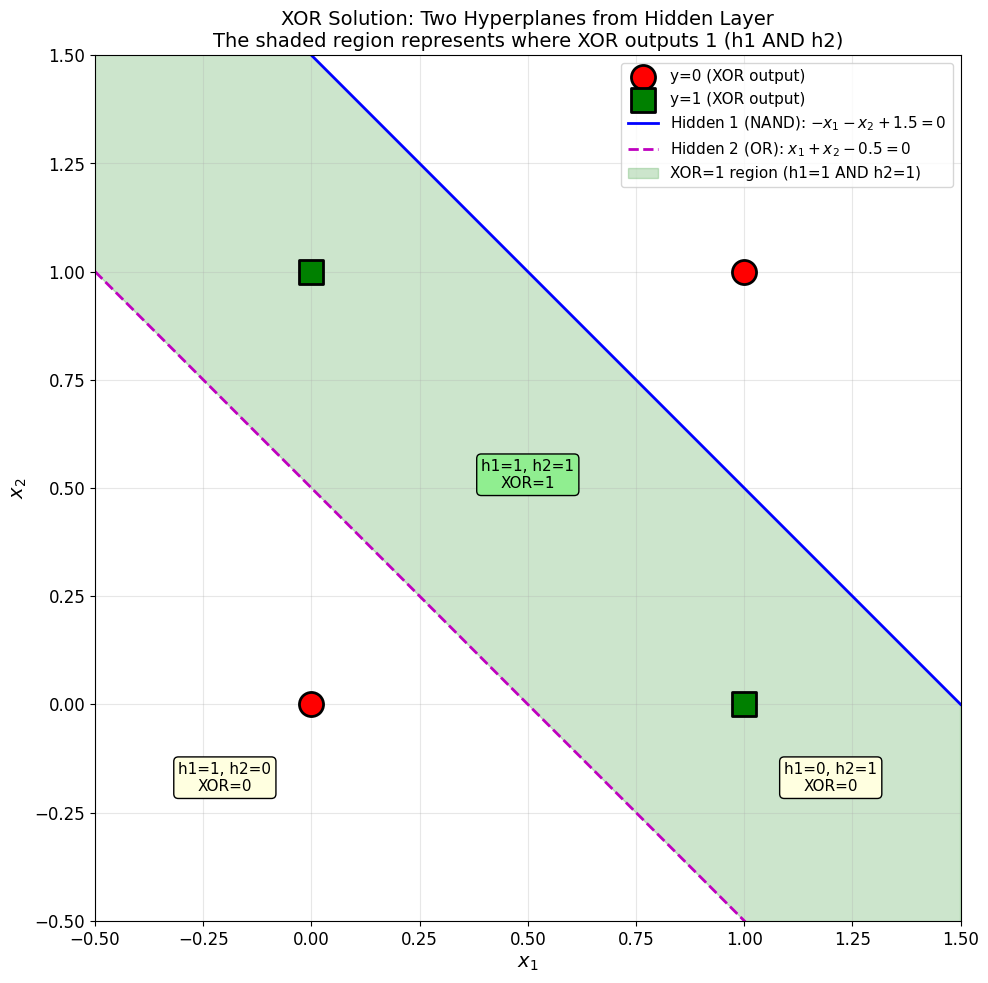

Figure saved as 'xor_two_hyperplanes.png'


In [91]:
# Visualise the two hyperplanes from the hidden layer
fig, ax = plt.subplots(figsize=(10, 10))

# Plot data points
for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='red', marker='o', s=300,
                  edgecolors='black', linewidths=2, zorder=5,
                  label='y=0 (XOR output)' if i == 0 else '')
    else:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='green', marker='s', s=300,
                  edgecolors='black', linewidths=2, zorder=5,
                  label='y=1 (XOR output)' if i == 1 else '')

# Define the two hyperplanes from hidden layer
x1_range = np.linspace(-0.5, 1.5, 100)

# Hidden neuron 1: -x1 - x2 + 1.5 = 0 => x2 = -x1 + 1.5
x2_h1 = -x1_range + 1.5
ax.plot(x1_range, x2_h1, 'b-', linewidth=2, label='Hidden 1 (NAND): $-x_1 - x_2 + 1.5 = 0$')

# Hidden neuron 2: x1 + x2 - 0.5 = 0 => x2 = -x1 + 0.5
x2_h2 = -x1_range + 0.5
ax.plot(x1_range, x2_h2, 'm--', linewidth=2, label='Hidden 2 (OR): $x_1 + x_2 - 0.5 = 0$')

# Shade the region where XOR = 1 (between the two lines, where both h1=1 and h2=1)
ax.fill_between(x1_range, x2_h2, x2_h1, alpha=0.2, color='green',
               label='XOR=1 region (h1=1 AND h2=1)')

# Add annotations for the three regions
ax.annotate('h1=1, h2=0\nXOR=0', xy=(-0.2, -0.2), fontsize=11, ha='center',
           bbox=dict(boxstyle='round', facecolor='lightyellow'))
ax.annotate('h1=1, h2=1\nXOR=1', xy=(0.5, 0.5), fontsize=11, ha='center',
           bbox=dict(boxstyle='round', facecolor='lightgreen'))
ax.annotate('h1=0, h2=1\nXOR=0', xy=(1.2, -0.2), fontsize=11, ha='center',
           bbox=dict(boxstyle='round', facecolor='lightyellow'))

# Formatting
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_title('XOR Solution: Two Hyperplanes from Hidden Layer\n'
            'The shaded region represents where XOR outputs 1 (h1 AND h2)',
            fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', fontsize=11)
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('xor_two_hyperplanes.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure saved as 'xor_two_hyperplanes.png'")

## Task 5.3

In [92]:
class TwoLayerPerceptron:
    """
    A two-layer perceptron (MLP) for XOR using sigmoid activation.
    This is a preview of Lab 2 concepts (backpropagation and gradient descent).
    """
    
    def __init__(self, input_size=2, hidden_size=2, output_size=1, learning_rate=0.5):
        """
        Initialise the network with random weights and biases.
        
        Parameters:
        -----------
        input_size : int
            Number of input features
        hidden_size : int
            Number of hidden neurons
        output_size : int
            Number of output neurons (usually 1 for binary classification)
        learning_rate : float
            Learning rate for gradient descent
        """
        self.learning_rate = learning_rate
        
        # Weights and biases: input -> hidden
        self.weights_ih = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_h = np.random.uniform(-1, 1, hidden_size)
        
        # Weights and biases: hidden -> output
        self.weights_ho = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_o = np.random.uniform(-1, 1, output_size)
    
    def sigmoid(self, x):
        """Sigmoid activation function: σ(x) = 1 / (1 + e^(-x))"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to avoid overflow
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid: σ'(x) = σ(x)(1 - σ(x))"""
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def forward(self, X):
        """
        Forward pass through the network.
        Stores intermediate values for backpropagation.
        """
        # Input to hidden layer
        self.z_h = np.dot(X, self.weights_ih) + self.bias_h
        self.a_h = self.sigmoid(self.z_h)
        
        # Hidden to output layer
        self.z_o = np.dot(self.a_h, self.weights_ho) + self.bias_o
        self.a_o = self.sigmoid(self.z_o)
        
        return self.a_o
    
    def backward(self, X, y):
        """
        Backward pass (backpropagation) to compute gradients and update weights.
        """
        m = X.shape[0]  # Number of samples
        
        # Output layer error and gradient
        output_error = y - self.a_o
        output_delta = output_error * self.sigmoid_derivative(self.z_o)
        
        # Hidden layer error and gradient
        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.z_h)
        
        # Update weights and biases using gradient descent
        self.weights_ho += self.learning_rate * np.dot(self.a_h.T, output_delta) / m
        self.bias_o += self.learning_rate * np.mean(output_delta, axis=0)
        
        self.weights_ih += self.learning_rate * np.dot(X.T, hidden_delta) / m
        self.bias_h += self.learning_rate * np.mean(hidden_delta, axis=0)
    
    def train(self, X, y, epochs, verbose_interval=1000):
        """
        Train the network using backpropagation.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training inputs
        y : array-like, shape (n_samples, 1)
            Training targets
        epochs : int
            Number of training epochs
        verbose_interval : int
            How often to print loss
        
        Returns:
        --------
        list : Loss values at each epoch
        """
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Compute loss (Mean Squared Error)
            loss = np.mean((output - y.reshape(-1, 1)) ** 2)
            losses.append(loss)
            
            # Backward pass and weight update
            self.backward(X, y)
            
            if epoch % verbose_interval == 0:
                print(f"Epoch {epoch:5d}: Loss = {loss:.6f}")
        
        return losses
    
    def predict(self, X):
        """
        Make predictions (rounded to 0 or 1).
        """
        output = self.forward(X)
        return (output >= 0.5).astype(int).flatten()

# Train the network
print("Training two-layer network for XOR (with sigmoid + backpropagation):")
print("=" * 60)

np.random.seed(42)
y_xor_train = y_xor.reshape(-1, 1)  # Reshape to (n_samples, 1)

# Create and train the network
mlp = TwoLayerPerceptron(hidden_size=4, learning_rate=2.0)
losses = mlp.train(X_xor, y_xor_train, epochs=10001, verbose_interval=2000)

# Test the trained network
print("\nTesting trained network:")
print("-" * 40)
predictions = mlp.predict(X_xor)
correct_predictions = 0

for i in range(len(X_xor)):
    expected = y_xor_train[i][0]
    is_correct = predictions[i] == expected
    if is_correct:
        correct_predictions += 1
    symbol = "✓" if is_correct else "✗"
    print(f"XOR({X_xor[i][0]}, {X_xor[i][1]}) = {predictions[i]}, Expected: {int(expected)} {symbol}")

print("-" * 40)
accuracy = (correct_predictions / len(X_xor)) * 100
print(f"Accuracy: {correct_predictions}/{len(X_xor)} = {accuracy:.1f}%")

Training two-layer network for XOR (with sigmoid + backpropagation):
Epoch     0: Loss = 0.315398
Epoch  2000: Loss = 0.002133
Epoch  4000: Loss = 0.000789
Epoch  6000: Loss = 0.000475
Epoch  8000: Loss = 0.000338
Epoch 10000: Loss = 0.000262

Testing trained network:
----------------------------------------
XOR(0, 0) = 0, Expected: 0 ✓
XOR(0, 1) = 1, Expected: 1 ✓
XOR(1, 0) = 1, Expected: 1 ✓
XOR(1, 1) = 0, Expected: 0 ✓
----------------------------------------
Accuracy: 4/4 = 100.0%


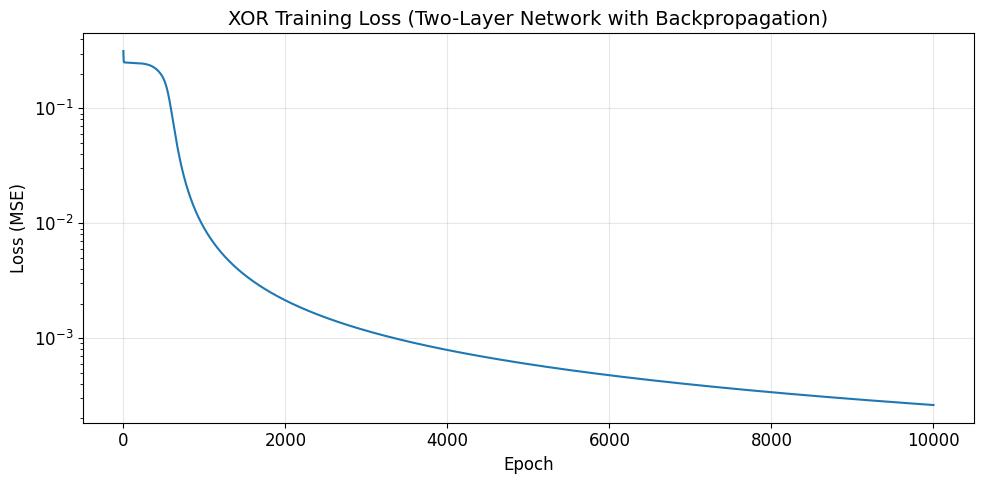

Figure saved as 'xor_training_loss.png'


In [93]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('XOR Training Loss (Two-Layer Network with Backpropagation)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.savefig('xor_training_loss.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved as 'xor_training_loss.png'")